In [23]:
!pip install svg.path


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from scipy.linalg import circulant
from svg.path import parse_path,Line,QuadraticBezier,CubicBezier
# for animation: credit notes of Nick Charlton, Jake Vanderplas, Louis Tiao
## ffmpeg must be installed

In [2]:
#path = 'M 200,100 L 300,100 Q 200,200 200,300'
#path = "M 151 191 Q 71 191 71 181 Q 71 171 36 171 Q 1 171 1 131 Q 1 91 11 91 Q 21 91 21 46 Q 21 1 111 1 Q 201 1 201 96 Q 201 191 151 191"
#path = "m465.325195,234.638107c0,0 38.621704,18.336853 99.483948,-90.512115c22.122498,-39.546761 260.947571,-9.281204 349.03241,41.746674c33.821533,19.592896 -146.670898,-15.539459 -246.380676,44.498932c-94.241211,56.745682 -83.242249,86.194229 -128.522827,104.698593c5.457947,34.715515 19.656311,74.428284 48.044128,119.257935c0.670471,19.048126 -42.329346,43.575317 -60.632202,38.782104c-18.302917,-4.793182 -20.267273,-69.656769 -75.556519,-105.740326c-31.706299,13.377686 -143.392181,20.184326 -195.491821,47.082458c-52.09964,26.898132 -133.780975,133.331879 -166.621674,168.330536c-32.840763,34.998779 83.496674,-266.595032 175.07309,-309.913361c12.974091,-7.386566 76.144409,18.181396 132.146362,-13.464874c13.308289,-7.520325 -1.226807,-76.449783 36.689697,-80.647034c18.480957,-2.045792 22.47229,31.484772 32.736084,35.880478z"
path = "M41.6,43.5c2,0.4,3.9,1.1,5.6,2.2c0.4,0.2,0.8,0.2,1.1-0.1c0.3-0.3,0.5-0.7,0.3-1.1c-0.4-1.2-1-2.2-1.7-3.1 c0.5,0.2,1.1,0.2,1.7,0.4c0.4,0.2,0.9,0.1,1.2-0.3c0.3-0.3,0.3-0.8,0.1-1.2c-1.3-1.9-2.9-3.6-4.8-5c0-0.3,0-0.6,0-0.8 c0-6.8-2.6-14-7.5-19.6S25.4,5.5,16.1,5.5C10.3,5.5,5,7.2,0.5,10.1c-0.4,0.2-0.6,0.7-0.4,1.2c0.2,0.4,0.6,0.7,1.1,0.7 c0.7-0.1,1.5-0.1,2.2-0.1c3.5,0,6.8,1,9.6,2.7c-3.5,1-6.4,3.6-7.5,7.1c-0.1,0.3,0,0.7,0.2,1s0.6,0.4,0.9,0.3c0,0,0.1,0,0.1,0 c-2.8,2-4.7,5.2-4.7,8.8v0.1c0,0.3,0.2,0.7,0.5,0.9c0.3,0.2,0.7,0.2,1,0c0.2-0.1,0.5-0.2,0.8-0.3c-1.3,1.8-2.2,4-2.2,6.4 c0,2,0.5,3.8,1.5,5.4c0.2,0.3,0.5,0.5,0.8,0.5c0.3,0,0.7-0.1,0.9-0.4c4.4-5.4,11-9,18.4-9.7c0,0.4-0.1,0.7-0.1,1.1 c0,6,4.9,10.8,10.8,10.8C37.1,46.5,39.6,45.3,41.6,43.5z"
## SVG Parser
mypath= parse_path(path)
## store coords
coords=[[],[]]
for el in mypath:
    if isinstance(el, Line):
        #print("\t\t eine Linie")
        v = el.end-el.start
        n = int(el.length()/4)
        if n < 1:
            n = 1
        v /= n
        start = el.start
        for i in range(n+1):
            coords[0].append(start.real)
            coords[1].append(start.imag)
            start += v
    if isinstance(el, QuadraticBezier):
        #print("\t\t QuadraticBezier")
        n = int(el.length()/4)
        if n < 1:
            n = 1
        v = el.control-el.start
        v /= n
        w = el.end-el.control
        w /= n
        for t in range(n+1):
            P = el.start + t * v
            Q = el.control + t * w
            PQ = (Q-P)/n
            C = P + t * PQ
            coords[0].append(C.real)
            coords[1].append(C.imag)
    if isinstance(el, CubicBezier):
        n = int(el.length()/4)
        if n < 1:
            n = 1
        v1 = el.control1-el.start
        v1 /= n
        v2 = el.end-el.control2
        v2 /=n
        v3 = el.control2-el.control1
        v3 /=n
        for t in range(n+1):
            P = el.start + t * v1
            Q = el.control2 + t * v2
            R = el.control1 + t * v3
            
            PR = (R-P)/n
            C = P + t * PR
            
            RQ = (Q-R)/n
            D = R + t * RQ
            
            CD = (D-C)/n
            E = C + t * CD
            
            coords[0].append(E.real)
            coords[1].append(E.imag)
        
len(coords[0])

89

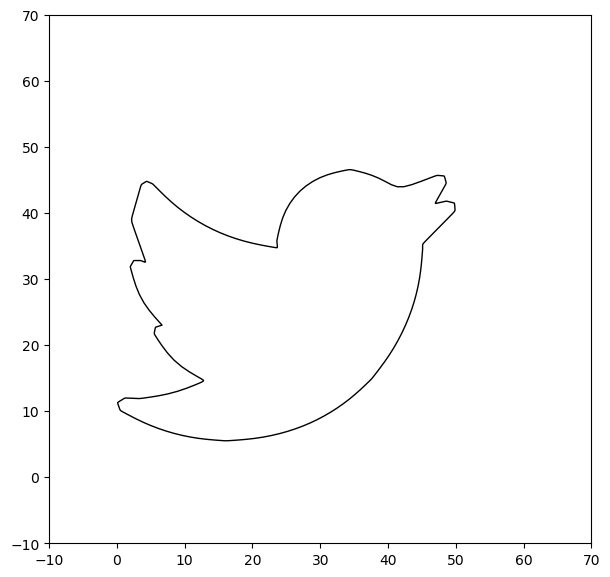

In [3]:
coordsnp = np.zeros([len(coords[0]),2])
coordsnp[:,0] = np.array(coords[0])
coordsnp[:,1] = np.array(coords[1])

tt0 = np.linspace(0,1,len(coords[0]))
tt1 = np.linspace(0,1,301)

coordsinterp = np.zeros([301,2])
coordsinterp[:,0] = np.interp(tt1,tt0,coordsnp[:,0])
coordsinterp[:,1] = np.interp(tt1,tt0,coordsnp[:,1])

#smooth
V = np.zeros(301)
V[0] = 0.25
V[1] = 0.5
V[2] = 0.25

C = circulant(V)
coordsinterp = C.dot(coordsinterp)
coordsinterp = C.dot(coordsinterp)
coordsinterp = C.dot(coordsinterp)
coordsinterp = C.dot(coordsinterp)

fig = plt.figure();
fig.set_dpi(100);
fig.set_size_inches(7,7);
#ax = plt.axes(xlim=(0,1000),ylim=(-300,700));
ax = plt.axes(xlim=(-10,70),ylim=(-10,70));
coordspatch = plt.Polygon(coordsinterp,closed=True,fc='none',ec='k');
ax.add_patch(coordspatch)
plt.show()

In [4]:
#fourier coeff
coordsinterpfft = np.fft.fft(coordsinterp[:,0]+1j*coordsinterp[:,1])
sz = coordsinterpfft.size
coordsinterpfft /= sz

In [5]:
#center of mass
offsetx = np.sum(coordsinterp[:,0])/sz
offsety = np.sum(coordsinterp[:,1])/sz
offsetx,offsety

(21.046149466162174, 29.294129388950406)

In [6]:
%%capture
N = 120
fig = plt.figure();
fig.set_dpi(120);
fig.set_size_inches(7,7);
#ax = plt.axes(xlim=(0,1000),ylim=(-300,700));
ax = plt.axes(xlim=(-8,58),ylim=(-8,58));
#no axis
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')


patches = np.array([])
freqs = np.array([])
coeffs = np.array([])
for i in range(N+1):
    if i%2 == 0:
        coeffs = np.append(coeffs,coordsinterpfft[-int(i/2)-1])
        freqs = np.append(freqs,-int(i/2)-1)
    else:
        coeffs = np.append(coeffs,coordsinterpfft[int(i/2)+1])
        freqs = np.append(freqs,int((i-1)/2)+1)
radii = np.abs(coeffs)
freqs /= 40

# sort by radii
bigarray = np.vstack((radii,coeffs.real,coeffs.imag,freqs)).T
bigarray = bigarray[bigarray[:,0].argsort()[::-1]]
    # courtesy Steve Tjoa, stackoverflow 5.13.2010
radii = bigarray[:,0]
coeffs = bigarray[:,1]+1j*bigarray[:,2]
freqs = bigarray[:,3]


# create initial patches
stationary_circle = plt.Circle((offsetx,offsety),radii[0],fc='none',ec='k',linewidth=0.2);
for i in range(N):
    patches = np.append(patches,
            plt.Circle((offsetx,offsety),radii[i+1],color='C0',fc='none',ec='k',linewidth=0.2,animated=True));

# outline patch
cst = coordsinterp[0]
patchM = plt.Polygon(np.array([cst,cst,cst]),
                   closed=False,fc='none',linewidth=4,ec='lightblue');

def animate(i):
    x = offsetx
    y = offsety
    for k in range(N):
        zk = coeffs[k] * np.exp(1j*freqs[k]*i)
        x += zk.real
        y += zk.imag
        patches[k].center = (x,y)
    
    xy = patchM.get_xy()
    xy = np.vstack((xy,np.array([x,y])))
    patchM.set_xy(xy)
    return np.append(np.append(patches,patchM),stationary_circle)
def init():
    for k in range(N):
        patches[k].center = (offsetx,offsety)
        ax.add_patch(patches[k])
    ax.add_patch(patchM)
    ax.add_patch(stationary_circle)
    return np.append(np.append(patches,patchM),stationary_circle)

anim = animation.FuncAnimation(fig,animate,
            init_func=init,frames=360,interval=55,blit=True);



In [7]:
HTML(anim.to_html5_video())